Estimated E[f] : 0.999584526482316
Theoritical E[f] : 1.0


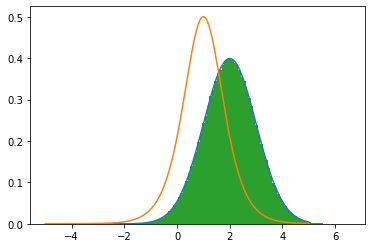

In [21]:
#importance sampling with normalized distribution
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

zsBin = 1000.0
zsArea = 10.0
zs = [z / zsBin  - zsArea / 2.0 for z in range(0, int(zsArea * zsBin) + 1)]

def normalDistribution(z, sigma = 1.0, mu = 0.0):
    return math.exp(-(z - mu)**2 / (2*sigma**2)) / math.sqrt(2*math.pi*sigma**2)

def logisticDistribution(z, mu = 0.0, scale = 1.0):
    return math.exp(-(z - mu) / scale) / (scale * (1 + math.exp(-(z - mu) / scale))**2)

muNorm = 2.0
muLogistic = 1.0
sLogistic = 0.5

qNorm = [normalDistribution(z, mu = muNorm) for z in zs]
pLogistic = [logisticDistribution(z, mu = muLogistic, scale = sLogistic) for z in zs]

#If Z_p / Z_q = 1 (p and q are normalized), as shown in (11.21), 1/L sum(r_l) should be 1
# f(z) = x, E[f] = muLogistic
samplingNum = 1000000
drawNorm = norm.rvs(loc = muNorm, scale = 1.0, size = samplingNum)

efs = [logisticDistribution(s, mu = muLogistic, scale = sLogistic) / normalDistribution(s, mu = muNorm) * s for s in drawNorm]    
ef = sum(efs) / samplingNum

print("Estimated E[f] : {}".format(ef))
print("Theoritical E[f] : {}".format(muLogistic))

plt.plot(zs, pNorm)
plt.plot(zs, pLogistic)
plt.hist(drawNorm, bins = 100, density = 1.0)
plt.show()

sLogisticが大きくなると、誤差が大きくなる。  
PRMLに記載されているように、qがほぼ0のところのpの確率が大きいと誤差が大きくなる。

Estimated E[f] : 0.997689834051326
Theoritical E[f] : 1.0


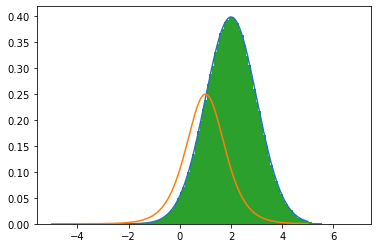

In [25]:
#importance sampling with not normalized distribution
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

zsBin = 1000.0
zsArea = 10.0
zs = [z / zsBin  - zsArea / 2.0 for z in range(0, int(zsArea * zsBin) + 1)]

def normalDistributionNotNormalized(z, sigma = 1.0, mu = 0.0):
    return math.exp(-(z - mu)**2 / (2*sigma**2)) / math.sqrt(sigma**2)

def logisticDistributionNotNormalized(z, mu = 0.0, scale = 1.0):
    return math.exp(-(z - mu) / scale) / ((1 + math.exp(-(z - mu) / scale))**2)

muNorm = 2.0
muLogistic = 1.0
sLogistic = 0.5

qNorm = [normalDistributionNotNormalized(z, mu = muNorm) for z in zs]
pLogistic = [logisticDistributionNotNormalized(z, mu = muLogistic, scale = sLogistic) for z in zs]

# f(z) = x, E[f] = muLogistic
samplingNum = 1000000
#even if qNorm is not normalized, drawn data will be the same with normalized one
drawNorm = norm.rvs(loc = muNorm, scale = 1.0, size = samplingNum)

ri = [logisticDistributionNotNormalized(s, mu = muLogistic, scale = sLogistic) / normalDistributionNotNormalized(s, mu = muNorm) for s in drawNorm]    
sumRi = sum(ri)
ef = np.array(ri).dot(np.array(drawNorm).T) / sumRi

print("Estimated E[f] : {}".format(ef))
print("Theoritical E[f] : {}".format(muLogistic))

plt.plot(zs, pNorm)
plt.plot(zs, pLogistic)
plt.hist(drawNorm, bins = 100, density = 1.0)
plt.show()